In [1]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("Fraud_check.csv")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
#Count of duplicated rows
df[df.duplicated()].shape

(0, 6)

In [4]:
df['Fraud'] = np.where(df['Taxable.Income']<= 30000, 'Risky', 'Good')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Fraud
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [5]:
data = df.rename({'Marital.Status': 'Marital_Status', 'Taxable.Income': 'Taxable_Income', 'City.Population': 'City_Population', 'Work.Experience': 'Work_Experience'}, axis=1)
data

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,Fraud
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [6]:
fraud = pd.get_dummies(data.iloc[:,0:6])
fraud

,Taxable_Income,City_Population,Work_Experience,Undergrad_NO,Undergrad_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1
596,69967,55369,2,0,1,1,0,0,0,1
597,47334,154058,0,1,0,1,0,0,0,1
598,98592,180083,17,0,1,0,1,0,1,0


In [7]:
fraud['Fraud'] = data['Fraud'].map({'Risky':1 ,'Good':0})
fraud

,Taxable_Income,City_Population,Work_Experience,Undergrad_NO,Undergrad_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Urban_NO,Urban_YES,Fraud
0,68833,50047,10,1,0,0,0,1,0,1,0
1,33700,134075,18,0,1,1,0,0,0,1,0
2,36925,160205,30,1,0,0,1,0,0,1,0
3,50190,193264,15,0,1,0,0,1,0,1,0
4,81002,27533,28,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1,0
596,69967,55369,2,0,1,1,0,0,0,1,0
597,47334,154058,0,1,0,1,0,0,0,1,0
598,98592,180083,17,0,1,0,1,0,1,0,0


In [8]:
fraud.describe()

,Taxable_Income,City_Population,Work_Experience,Undergrad_NO,Undergrad_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Urban_NO,Urban_YES,Fraud
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333,0.480000,0.520000,0.315000,0.323333,0.361667,0.496667,0.503333,0.206667
std,26204.827597,49850.075134,8.842147,0.500017,0.500017,0.464903,0.468139,0.480884,0.500406,0.500406,0.405252
min,10003.000000,25779.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32871.500000,66966.750000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55074.500000,106493.500000,15.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,78611.750000,150114.250000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,99619.000000,199778.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
#Correlation
fraud.corr()

,Taxable_Income,City_Population,Work_Experience,Undergrad_NO,Undergrad_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Urban_NO,Urban_YES,Fraud
Taxable_Income,1.000000,-0.064387,-0.001818,0.049232,-0.049232,0.062099,-0.100611,0.037910,-0.070628,0.070628,-0.688725
City_Population,-0.064387,1.000000,0.013135,-0.079579,0.079579,0.004925,-0.007035,0.002087,0.040098,-0.040098,0.012225
Work_Experience,-0.001818,0.013135,1.000000,0.005362,-0.005362,-0.014833,0.033347,-0.018123,0.094559,-0.094559,-0.001972
Undergrad_NO,0.049232,-0.079579,0.005362,1.000000,-1.000000,0.045101,-0.015120,-0.028883,-0.000267,0.000267,-0.012523
Undergrad_YES,-0.049232,0.079579,-0.005362,-1.000000,1.000000,-0.045101,0.015120,0.028883,0.000267,-0.000267,0.012523
Marital_Status_Divorced,0.062099,0.004925,-0.014833,0.045101,-0.045101,1.000000,-0.468757,-0.510435,0.065518,-0.065518,-0.027115
Marital_Status_Married,-0.100611,-0.007035,0.033347,-0.015120,0.015120,-0.468757,1.000000,-0.520317,-0.016771,0.016771,0.043178
Marital_Status_Single,0.037910,0.002087,-0.018123,-0.028883,0.028883,-0.510435,-0.520317,1.000000,-0.047014,0.047014,-0.015820
Urban_NO,-0.070628,0.040098,0.094559,-0.000267,0.000267,0.065518,-0.016771,-0.047014,1.000000,-1.000000,-0.004830
Urban_YES,0.070628,-0.040098,-0.094559,0.000267,-0.000267,-0.065518,0.016771,0.047014,-1.000000,1.000000,0.004830


In [10]:
fraud.Fraud.value_counts()

0    476
1    124
Name: Fraud, dtype: int64

In [17]:
# Labels are the values we want to predict
y = np.array(fraud['Fraud'])
# Remove the y from fraud data
fraud1 = fraud.drop(['Fraud','Taxable_Income'], axis = 1)
# Saving feature names for later use
fraud_list = list(fraud1.columns)
# Convert to numpy array because the algorithm works only on arrays
X = np.array(fraud1)

In [12]:
#Separating dependent and independent variables
#X = fraud.iloc[:,1:-1] #Dropped Taxable Income feature
#y = fraud['Fraud']

In [18]:
num_trees = 200
kfold = KFold(n_splits=10, random_state=6, shuffle= True)
model = RandomForestClassifier(n_estimators=num_trees, max_features=5)
model.fit(X,y)
results = cross_val_score(model, X, y, cv=kfold)
print(round(results.mean()*100,2),'%')

74.33 %


In [19]:
# Get numerical feature importances
importances = list(model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(fraud1, round(importance, 2)) for fraud1, importance in zip(fraud_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: City_Population      Importance: 0.53
Variable: Work_Experience      Importance: 0.29
Variable: Undergrad_NO         Importance: 0.03
Variable: Undergrad_YES        Importance: 0.03
Variable: Marital_Status_Married Importance: 0.03
Variable: Urban_YES            Importance: 0.03
Variable: Marital_Status_Divorced Importance: 0.02
Variable: Marital_Status_Single Importance: 0.02
Variable: Urban_NO             Importance: 0.02


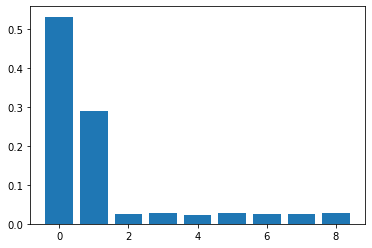

In [23]:
#plot feature importance
plt.bar([x for x in range(len(importances))], importances)
plt.show()